<a href="https://colab.research.google.com/github/Mazharul667/cse299/blob/main/sig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
CSE 299 Section : 3
Group : 4


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model

In [ ]:
train_dir="/content/drive/MyDrive/cse299/sign_data/train"
test_dir="/content/drive/MyDrive/cse299/sign_data/test"

In [40]:
# img = plt.imread('/content/drive/MyDrive/cse299/sign_data/train/001/001_01.PNG')
# plt.imshow(img)

In [41]:
# img1 = plt.imread('/content/drive/MyDrive/cse299/sign_data/train/001_forg/0119001_01.png')
# plt.imshow(img1)

In [ ]:
SIZE = 224

In [ ]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir('/content/drive/MyDrive/cse299/sign_data/train'):
    for data in glob.glob('/content/drive/MyDrive/cse299/sign_data/train/'+per+'/*.*'):

        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('/content/drive/MyDrive/cse299/sign_data/test'):
    for data in glob.glob('/content/drive/MyDrive/cse299/sign_data/test/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [ ]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

![image.png](attachment:8470a278-87b0-4da0-9e5f-6823f84fbfdc.png)

In [ ]:
input_ = (224,224,3)
EPOCHS = 20
BS = 64
output_ = 2

<h3> Feature Extraction Results </h3>

![image.png](attachment:a23ab6f3-9629-4231-ad62-abfcc26b1f04.png)

<h3> Graphs of Best Performing Models </h3>

![image.png](attachment:5e5176a7-51fa-4496-b248-93e77a2df510.png)

<h3> Feature Selection </h3>

# VGG16

58889256/58889256 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
19/19 [==============================]

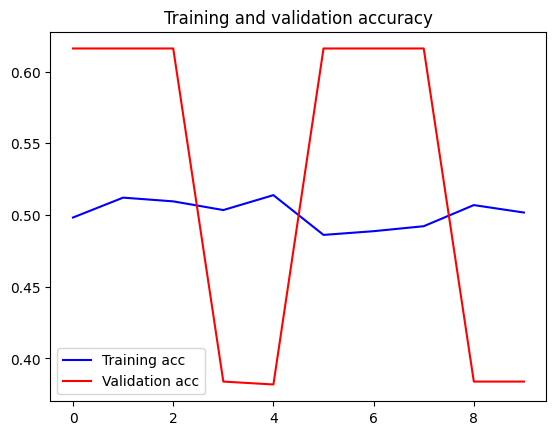

<Figure size 640x480 with 0 Axes>

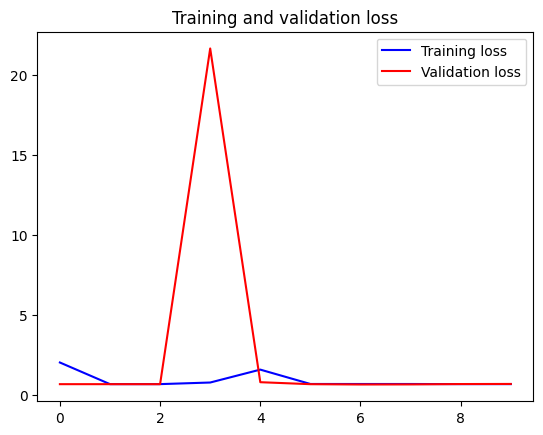

16/16 [==============================] - 5s 313ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

print(intermediate_output_train)
print(intermediate_output_test)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/vgg') # to save this vgg16

# ResNet50

94765736/94765736 [==============================] - 1s 0us/step


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
19/19 [========================

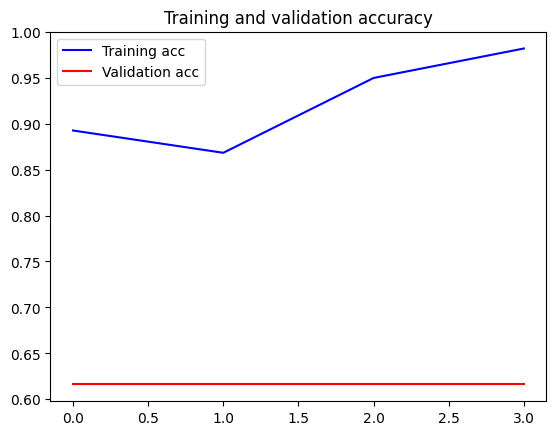

<Figure size 640x480 with 0 Axes>

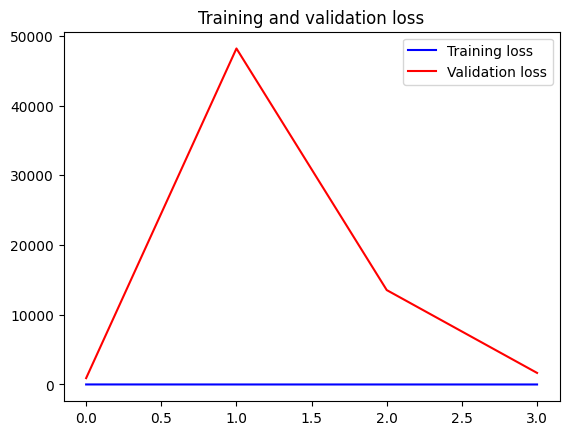

16/16 [==============================] - 2s 146ms/step
[[   0.        0.        0.     ...    0.     1316.3922    0.    ]
 [   0.        0.        0.     ...    0.     1316.0193    0.    ]
 [   0.        0.        0.     ...    0.     1316.6957    0.    ]
 ...
 [   0.        0.        0.     ...    0.     1315.2441    0.    ]
 [   0.        0.        0.     ...    0.     1314.5422    0.    ]
 [   0.        0.        0.     ...    0.     1315.6624    0.    ]]
[[   0.        0.        0.     ...    0.     1316.2125    0.    ]
 [   0.        0.        0.     ...    0.     1316.4279    0.    ]
 [   0.        0.        0.     ...    0.     1316.8883    0.    ]
 ...
 [   0.        0.        0.     ...    0.     1314.9547    0.    ]
 [   0.        0.        0.     ...    0.     1314.3247    0.    ]
 [   0.        0.        0.     ...    0.     1314.6604    0.    ]]


In [ ]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

print(intermediate_output_train)
print(intermediate_output_test)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/resnet') #to save resnet

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/models/resnet')

while 2>1 :
    test_image_path_1 = input("Enter the path to the first test image: ")
    test_image_path_2 = input("Enter the path to the second test image: ")

    image_1 = cv2.imread(test_image_path_1)
    image_rgb_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
    resized_image_1 = cv2.resize(image_rgb_1, (224, 224))
    normalized_image_1 = resized_image_1 / 255.0
    preprocessed_image_1 = np.expand_dims(normalized_image_1, axis=0)

    image_2 = cv2.imread(test_image_path_2)
    image_rgb_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
    resized_image_2 = cv2.resize(image_rgb_2, (224, 224))
    normalized_image_2 = resized_image_2 / 255.0
    preprocessed_image_2 = np.expand_dims(normalized_image_2, axis=0)

    prediction_1 = model.predict(preprocessed_image_1)
    prediction_2 = model.predict(preprocessed_image_2)

    if prediction_1[0][0] > 0.5:
        print("First image: Genuine signature")
    else:
        print("First image: Forged signature")

    if prediction_2[0][0] > 0.5:
        print("Second image: Genuine signature")
    else:
        print("Second image: Forged signature")


Enter the path to the first test image: /content/drive/MyDrive/CSE299 Dataset and Code/sign_data/train/024/01_024.png
Enter the path to the second test image: /content/drive/MyDrive/CSE299 Dataset and Code/sign_data/train/024/04_024.png
1/1 [==============================] - 0s 25ms/step
First image: Genuine signature
Second image: Genuine signature


KeyboardInterrupt: ignored